In [53]:
import pandas as pd
df = pd.read_csv('ST_train.csv')
#df = pd.read_csv('ST_test.csv')

In [54]:
Cabin_pred_df = df[['HomePlanet', 'Cabin', 'PassengerId', 'CryoSleep']].copy()
Cabin_pred_df = Cabin_pred_df.dropna()
Cabin_pred_df[['deck', 'num', 'side']] = Cabin_pred_df['Cabin'].str.split('/', expand=True)

Cabin_pred_df[['Group', 'Member']] = Cabin_pred_df['PassengerId'].str.split('_', expand=True)
Cabin_pred_df.head()

,HomePlanet,Cabin,PassengerId,CryoSleep,deck,num,side,Group,Member
0,Earth,G/3/S,0013_01,True,G,3,S,0013,01
1,Earth,F/4/S,0018_01,False,F,4,S,0018,01
2,Europa,C/0/S,0019_01,True,C,0,S,0019,01
3,Europa,C/1/S,0021_01,False,C,1,S,0021,01
4,Earth,F/5/S,0023_01,False,F,5,S,0023,01


In [55]:
Cabin_pred_df.shape

(4004, 9)

**Predicting deck**

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
label_encoder_homeplanet = LabelEncoder()
Cabin_pred_df['HomePlanet_encoded'] = label_encoder_homeplanet.fit_transform(Cabin_pred_df['HomePlanet'])

# Extracting features and target
X = Cabin_pred_df[['HomePlanet_encoded']]  # Features
y = Cabin_pred_df['deck']  # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Model Evaluation (Optional)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"DecisionTree 'HomePlanet_encoded' model Accuracy: {accuracy}")

DecisionTree 'HomePlanet_encoded' model Accuracy: 0.5368289637952559


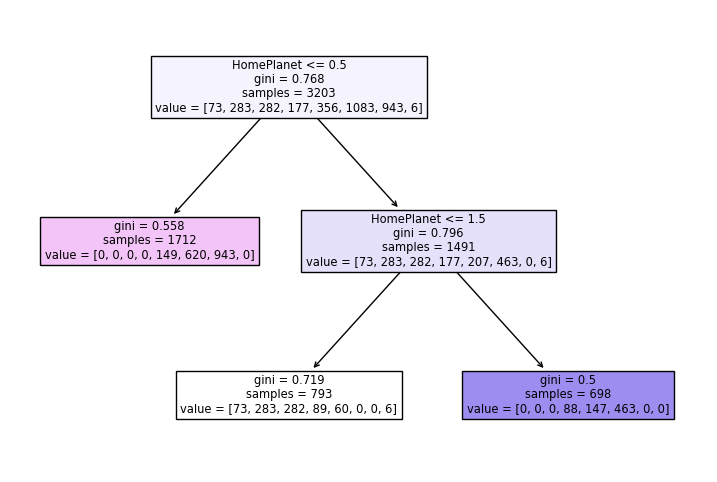

In [57]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
# Visualize the decision tree using plot_tree
plt.figure(figsize=(9, 6))
plot_tree(decision_tree, filled=True, feature_names=['HomePlanet'])
plt.show()

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
label_encoder_homeplanet = LabelEncoder()
Cabin_pred_df['HomePlanet_encoded'] = label_encoder_homeplanet.fit_transform(Cabin_pred_df['HomePlanet'])

# Convert 'CryoSleep' to int (False to 0 and True to 1)
Cabin_pred_df['CryoSleep'] = Cabin_pred_df['CryoSleep'].astype(int)

# Extracting features and target
X = Cabin_pred_df[['HomePlanet_encoded', 'CryoSleep']]  # Features
y = Cabin_pred_df['deck']  # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
decision_tree2 = DecisionTreeClassifier()
decision_tree2.fit(X_train, y_train)

# Model Evaluation (Optional)
y_pred = decision_tree2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"DecisionTree 'HomePlanet_encoded', 'CryoSleep' model Accuracy: {accuracy}")

DecisionTree 'HomePlanet_encoded', 'CryoSleep' model Accuracy: 0.6267166042446941


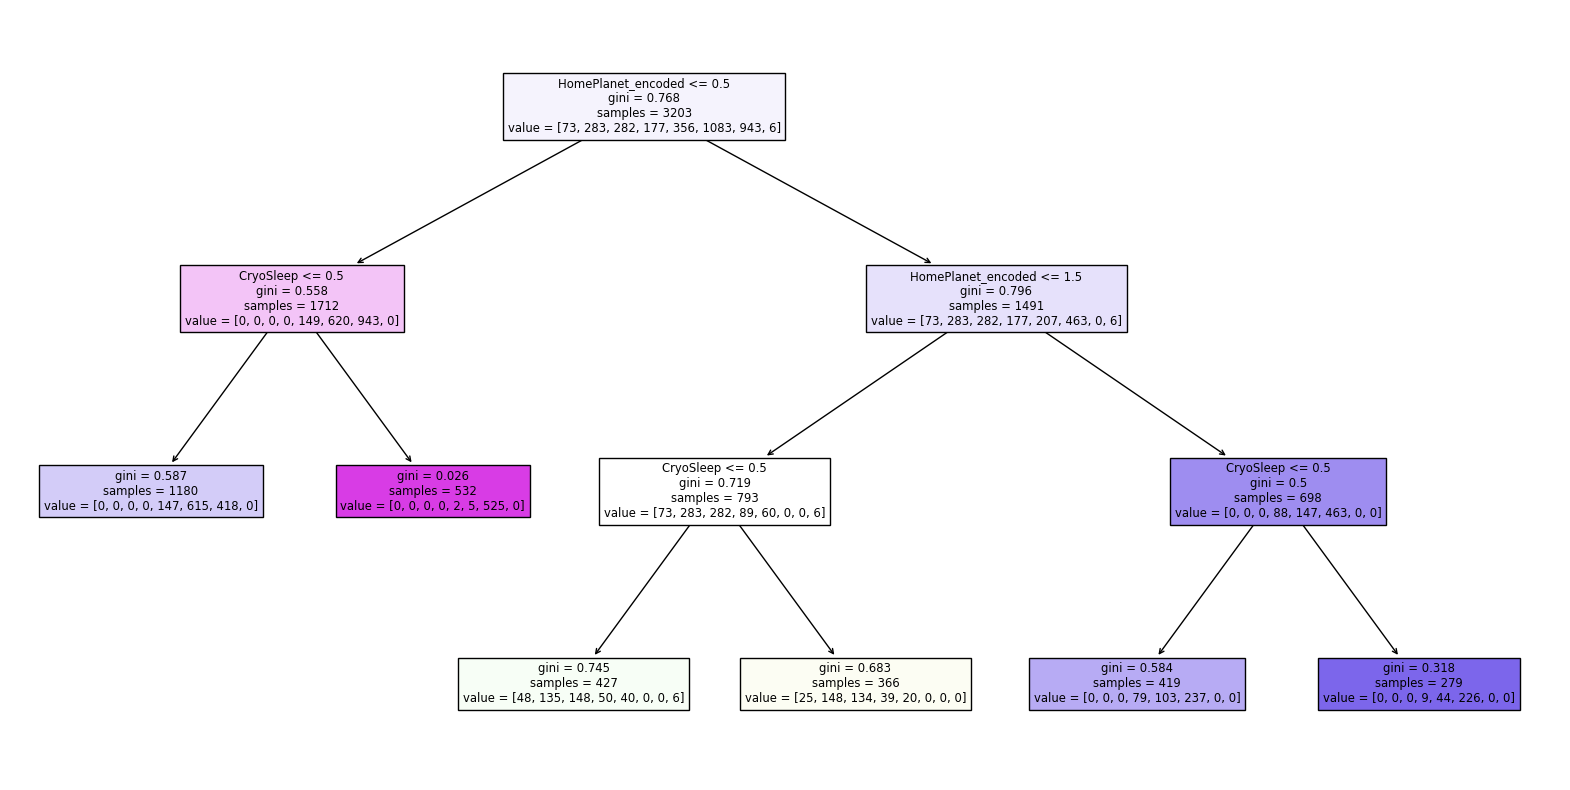

In [59]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'decision_tree' is your trained model
plt.figure(figsize=(20, 10))
plot_tree(decision_tree2, filled=True, feature_names=['HomePlanet_encoded', 'CryoSleep', 'num'])
plt.show()

**final deck imputation**

In [60]:
Cabin_imput_df = df[['HomePlanet', 'Cabin', 'CryoSleep']].copy()
Cabin_imput_df[['deck', 'num', 'side']] = Cabin_imput_df['Cabin'].str.split('/', expand=True)
Cabin_imput_df['HomePlanet_encoded'] = label_encoder_homeplanet.fit_transform(Cabin_imput_df['HomePlanet'])

cryosleep_mode = Cabin_imput_df['CryoSleep'].mode()[0]
# Impute missing values in 'CryoSleep' with the mode
Cabin_imput_df['CryoSleep'].fillna(cryosleep_mode, inplace=True)
Cabin_imput_df['CryoSleep'] = Cabin_imput_df['CryoSleep'].astype(int)
Cabin_imput_df.head()

,HomePlanet,Cabin,CryoSleep,deck,num,side,HomePlanet_encoded
0,Earth,G/3/S,1,G,3,S,0
1,Earth,F/4/S,0,F,4,S,0
2,Europa,C/0/S,1,C,0,S,1
3,Europa,C/1/S,0,C,1,S,1
4,Earth,F/5/S,0,F,5,S,0


In [61]:
Cabin_imput_df.to_csv('Cabin_imput_df.csv', index=True)

In [62]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Select rows where 'deck' is missing
missing_deck_df = Cabin_imput_df[Cabin_imput_df['deck'].isnull()]

# Extract features
X_missing = missing_deck_df[['HomePlanet_encoded', 'CryoSleep']]

# Step 2: Predict Missing Values
predicted_deck = decision_tree2.predict(X_missing)

# Step 3: Impute the Predictions
Cabin_imput_df.loc[Cabin_imput_df['deck'].isnull(), 'deck'] = predicted_deck

In [63]:
Cabin_imput_df.to_csv('Cabin_imput_df_fin.csv', index=True)

**Predicting num**

In [64]:
Cabin_num_pred_df = df[['HomePlanet', 'Cabin', 'PassengerId']].copy()
Cabin_num_pred_df = Cabin_pred_df.dropna()
Cabin_num_pred_df[['deck', 'num', 'side']] = Cabin_num_pred_df['Cabin'].str.split('/', expand=True)

Cabin_num_pred_df[['Group', 'Member']] = Cabin_num_pred_df['PassengerId'].str.split('_', expand=True)
Cabin_num_pred_df.head()

,HomePlanet,Cabin,PassengerId,CryoSleep,deck,num,side,Group,Member,HomePlanet_encoded
0,Earth,G/3/S,0013_01,1,G,3,S,0013,01,0
1,Earth,F/4/S,0018_01,0,F,4,S,0018,01,0
2,Europa,C/0/S,0019_01,1,C,0,S,0019,01,1
3,Europa,C/1/S,0021_01,0,C,1,S,0021,01,1
4,Earth,F/5/S,0023_01,0,F,5,S,0023,01,0


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


# Extracting features and target
X = Cabin_pred_df[['Group']]  # Features
y = Cabin_pred_df['num']  # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
decision_tree3 = DecisionTreeClassifier()
decision_tree3.fit(X_train, y_train)

# Model Evaluation (Optional)
y_pred = decision_tree3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"DecisionTree 'Group' model Accuracy: {accuracy}")

DecisionTree 'Group' model Accuracy: 0.27715355805243447


**final num imputation**

In [66]:
Cabin_num_imput_df = df[['HomePlanet', 'Cabin', 'PassengerId']].copy()

Cabin_num_imput_df[['deck', 'num', 'side']] = Cabin_num_imput_df['Cabin'].str.split('/', expand=True)

Cabin_num_imput_df[['Group', 'Member']] = Cabin_num_imput_df['PassengerId'].str.split('_', expand=True)
Cabin_num_imput_df.head()

,HomePlanet,Cabin,PassengerId,deck,num,side,Group,Member
0,Earth,G/3/S,0013_01,G,3,S,0013,01
1,Earth,F/4/S,0018_01,F,4,S,0018,01
2,Europa,C/0/S,0019_01,C,0,S,0019,01
3,Europa,C/1/S,0021_01,C,1,S,0021,01
4,Earth,F/5/S,0023_01,F,5,S,0023,01


In [67]:
Cabin_num_imput_df.to_csv('Cabin_num_imput_df.csv', index=True)

In [68]:
from sklearn.tree import DecisionTreeClassifier

# Select rows where 'deck' is missing
missing_num_deck_df = Cabin_num_imput_df[Cabin_num_imput_df['num'].isnull()]

# Extract features
X_missing = missing_num_deck_df[['Group']]

# Step 2: Predict Missing Values
predicted_deck = decision_tree3.predict(X_missing)

# Step 3: Impute the Predictions
Cabin_num_imput_df.loc[Cabin_num_imput_df['num'].isnull(), 'num'] = predicted_deck

In [69]:
Cabin_num_imput_df.to_csv('Cabin_num_imput_df_fin.csv', index=True)

**Randomising Side**

In [70]:
import numpy as np
Cabin_side_imput_df = df[['Cabin']].copy()

Cabin_side_imput_df[['deck', 'num', 'side']] = Cabin_side_imput_df['Cabin'].str.split('/', expand=True)
unique_sides = Cabin_side_imput_df['side'].dropna().unique()
Cabin_side_imput_df.head()

,Cabin,deck,num,side
0,G/3/S,G,3,S
1,F/4/S,F,4,S
2,C/0/S,C,0,S
3,C/1/S,C,1,S
4,F/5/S,F,5,S


In [71]:
Cabin_side_imput_df.to_csv('Cabin_side_imput_df.csv', index=True)

In [72]:
Cabin_side_imput_df['side'] = Cabin_side_imput_df['side'].apply(lambda x: np.random.choice(unique_sides) if pd.isnull(x) else x)

In [73]:
Cabin_side_imput_df.to_csv('Cabin_side_imput_df_fin.csv', index=True)

**Compiling the imputed Cabin code**

In [74]:
Cabin_compil_df = df[['Cabin']].copy()
Cabin_compil_df[['deck', 'num', 'side']] = Cabin_compil_df['Cabin'].str.split('/', expand=True)
Cabin_compil_df.head()

,Cabin,deck,num,side
0,G/3/S,G,3,S
1,F/4/S,F,4,S
2,C/0/S,C,0,S
3,C/1/S,C,1,S
4,F/5/S,F,5,S


In [75]:
Cabin_compil_df.to_csv('Cabin_compil_df.csv', index=True)

In [76]:
Cabin_compil_df['deck'] = Cabin_compil_df['deck'].combine_first(Cabin_imput_df['deck'])
Cabin_compil_df['num'] = Cabin_compil_df['num'].combine_first(Cabin_num_imput_df['num'])
Cabin_compil_df['side'] = Cabin_compil_df['side'].combine_first(Cabin_side_imput_df['side'])

In [77]:
def compile_cabin(row):
    if pd.isna(row['Cabin']):
        # Join only if the values are not NaN
        return '/'.join([str(row[col]) for col in ['deck', 'num', 'side'] if pd.notna(row[col])])
    else:
        return row['Cabin']

# Apply the function to each row
Cabin_compil_df['Cabin'] = Cabin_compil_df.apply(compile_cabin, axis=1)

In [78]:
Cabin_compil_df.to_csv('Cabin_compil_df_fin.csv', index=True)